### Forward Propagation & Backpropagation

In [1]:
import torch
import matplotlib.pyplot as plt

---

Initialization: A simple neural net with 4 input neurons, 1 hidden layer with 3 neurons and 1 output neuron

In [2]:
n_input = 4
n_neurons_hidden_one = 3
n_output = 1

In [3]:
X = torch.tensor([[0.9], [0.8], [0.7], [0.6]])
W1 = torch.rand(n_input, n_neurons_hidden_one)
W2 = torch.rand(n_neurons_hidden_one, n_output)

In [4]:
print(f'Input sample data with 4 features (4x1):\n{X}\n')
print(f'First weight matrix (4x3):\n{W1}\n')
print(f'Second weight matrix (3x1):\n{W2}\n')

Input sample data with 4 features (4x1):
tensor([[0.9000],
        [0.8000],
        [0.7000],
        [0.6000]])

First weight matrix (4x3):
tensor([[0.2991, 0.8217, 0.3769],
        [0.9838, 0.0340, 0.8956],
        [0.9728, 0.3386, 0.3821],
        [0.5464, 0.4259, 0.6075]])

Second weight matrix (3x1):
tensor([[0.3389],
        [0.7874],
        [0.9845]])



Forward Propagation

In [5]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

In [6]:
Z = W1.t().matmul(X) 
H = sigmoid(Z) 
O = H.t().matmul(W2)
Y_cap = sigmoid(O)

In [7]:
print(f'Initial output from the randomly initialized weights:\n{Y_cap}')

Initial output from the randomly initialized weights:
tensor([[0.8513]])


Error Calculation

In [8]:
Y = 0
E = torch.pow(Y - Y_cap, 2)
print(f'Initial error:\n{E}')

Initial error:
tensor([[0.7247]])


Backpropagation

In [9]:
def sigmoid_grad(x):
    return x * (1 - x)

In [10]:
dE_dY_cap = -2 * (Y - Y_cap)
dY_cap_dO = sigmoid_grad(Y_cap)
dO_dW2 = H

dE_dW2 = dE_dY_cap * dY_cap_dO * dO_dW2

In [11]:
print(f'Gradient of weight matrix two w.r.t error:\n{dE_dW2}')

Gradient of weight matrix two w.r.t error:
tensor([[0.1913],
        [0.1679],
        [0.1819]])


In [12]:
dO_dH = W2
dH_dZ = sigmoid_grad(H)
dZ_dW1 = X

dE_dW1 = dE_dW2 * dO_dH * dH_dZ * dZ_dW1.t()

In [13]:
print(f'Gradient of weight matrix one w.r.t error:\n{dE_dW1.t()}')

Gradient of weight matrix one w.r.t error:
tensor([[0.0058, 0.0205, 0.0212],
        [0.0052, 0.0182, 0.0189],
        [0.0045, 0.0159, 0.0165],
        [0.0039, 0.0137, 0.0142]])


Parameter Updation

In [14]:
W2_new = W2 - 0.1 * dE_dW2
W1_new = W1 - 0.1 * dE_dW1.t()

Forward propapagtion with updated weights

In [15]:
Z = W1_new.t().matmul(X) 
H = sigmoid(Z) 
O = H.t().matmul(W2_new)
Y_cap = sigmoid(O)

In [16]:
print(f'New output from updated set of weights:\n{Y_cap}')

New output from updated set of weights:
tensor([[0.8453]])


---

Training loop

In [17]:
errors = []

for i in range(200):

    # forward
    Z = W1.t().matmul(X) 
    H = sigmoid(Z) 
    O = H.t().matmul(W2)
    Y_cap = sigmoid(O)

    # error calculation
    Y = 0
    E = torch.pow(Y - Y_cap, 2)
    errors.append(E.item())
    print(E)

    # backpropagation
    dE_dY_cap = -2 * (Y - Y_cap)
    dY_cap_dO = sigmoid_grad(Y_cap)
    dO_dW2 = H

    dE_dW2 = dE_dY_cap * dY_cap_dO * dO_dW2

    dO_dH = W2
    dH_dZ = sigmoid_grad(H)
    dZ_dW1 = X

    dE_dW1 = dE_dW2 * dO_dH * dH_dZ * dZ_dW1.t()

    # parameter updation
    W2 = W2 - 0.1 * dE_dW2
    W1 = W1 - 0.1 * dE_dW1.t()

tensor([[0.7247]])
tensor([[0.7145]])
tensor([[0.7038]])
tensor([[0.6925]])
tensor([[0.6807]])
tensor([[0.6684]])
tensor([[0.6555]])
tensor([[0.6420]])
tensor([[0.6279]])
tensor([[0.6133]])
tensor([[0.5981]])
tensor([[0.5824]])
tensor([[0.5662]])
tensor([[0.5495]])
tensor([[0.5324]])
tensor([[0.5149]])
tensor([[0.4971]])
tensor([[0.4791]])
tensor([[0.4609]])
tensor([[0.4427]])
tensor([[0.4245]])
tensor([[0.4064]])
tensor([[0.3885]])
tensor([[0.3709]])
tensor([[0.3536]])
tensor([[0.3368]])
tensor([[0.3205]])
tensor([[0.3048]])
tensor([[0.2896]])
tensor([[0.2751]])
tensor([[0.2612]])
tensor([[0.2480]])
tensor([[0.2355]])
tensor([[0.2236]])
tensor([[0.2124]])
tensor([[0.2018]])
tensor([[0.1919]])
tensor([[0.1825]])
tensor([[0.1737]])
tensor([[0.1654]])
tensor([[0.1577]])
tensor([[0.1504]])
tensor([[0.1436]])
tensor([[0.1372]])
tensor([[0.1311]])
tensor([[0.1255]])
tensor([[0.1202]])
tensor([[0.1152]])
tensor([[0.1105]])
tensor([[0.1061]])
tensor([[0.1020]])
tensor([[0.0981]])
tensor([[0.0

---

Loss plot

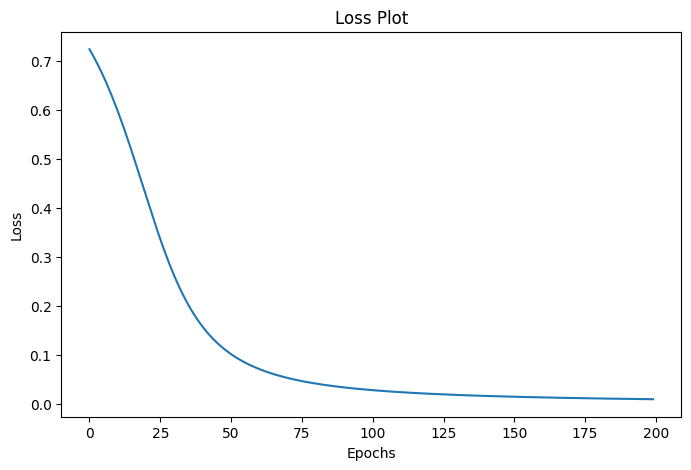

In [18]:
plt.figure(figsize = (8, 5))
plt.plot(errors)
plt.title("Loss Plot")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()